In [16]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import copy

In [28]:
df = pd.read_csv('hcvdat0.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.fillna(df.groupby('Category').transform('mean'), inplace=True)
df['Category'] = pd.Categorical(df['Category'])
df['Sex'] = pd.Categorical(df['Sex'])

In [29]:
df.dtypes

Category    category
Age            int64
Sex         category
ALB          float64
ALP          float64
ALT          float64
AST          float64
BIL          float64
CHE          float64
CHOL         float64
CREA         float64
GGT          float64
PROT         float64
dtype: object

In [30]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

In [31]:
for column in num_df.columns:
    scale = StandardScaler().fit(num_df[[column]])
    num_df[[column]] = scale.transform(num_df[[column]])

In [32]:
num_df

Age       ALB        ALP       ALT       AST       BIL       CHE  \
0   -1.533616 -0.536981  -0.592896 -0.815952 -0.383693 -0.198236 -0.574734   
1   -1.533616 -0.536981   0.090002 -0.410892 -0.305057 -0.381375  1.349161   
2   -1.533616  0.915564   0.258809  0.304845  0.538767 -0.269457  0.291926   
3   -1.533616  0.275752  -0.612078  0.084619 -0.368571  0.381706 -0.393234   
4   -1.533616 -0.415936   0.235790  0.163271 -0.302033 -0.091404  0.432588   
..        ...       ...        ...       ...       ...       ...       ...   
610  1.452371 -1.660975  13.375827 -0.886739  2.283879  1.963828 -1.191832   
611  1.651437 -3.044351   1.336867 -1.004718  0.290761  0.437665 -3.020439   
612  1.651437 -2.179741   0.742209 -0.981122  1.942115  1.862083 -2.965989   
613 -0.140155 -1.488052   0.969362  0.414959  0.823066  0.437665 -2.103866   
614  1.153773 -0.969286   0.969362  2.813859  1.367468  0.030689  0.396289   

         CHOL      CREA        GGT      PROT  
0   -1.895532  0.497070  -0.502286 -0.563709  
1   -0.500882 -0.146590  -0.438203  0.826611  
2   -0.145557  0.094783  -0.115957  1.345664  
3   -0.554181 -0.025903  -0.104971  0.678310  
4   -0.927272 -0.106361  -0.176378 -0.619322  
..        ...       ...        ...       ...  
610  0.831586 -0.514683  11.193789 -0.656397  
611 -2.082078 -0.367848  -0.066521 -0.137345  
612 -1.540207 -0.293425   0.451636  1.846179  
613 -1.033869 -0.589106   0.191642 -0.192957  
614 -0.056726 -0.287390  -0.101309 -0.749085  

[615 rows x 11 columns]

PCA

In [33]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(num_df.values)
num_df['pca1'] = pca_result[:,0]
num_df['pca2'] = pca_result[:,1] 
num_df['pca3'] = pca_result[:,2]
num_df1 = num_df.copy() #copy without y for further use
num_df['y'] = df['Category'].cat.codes

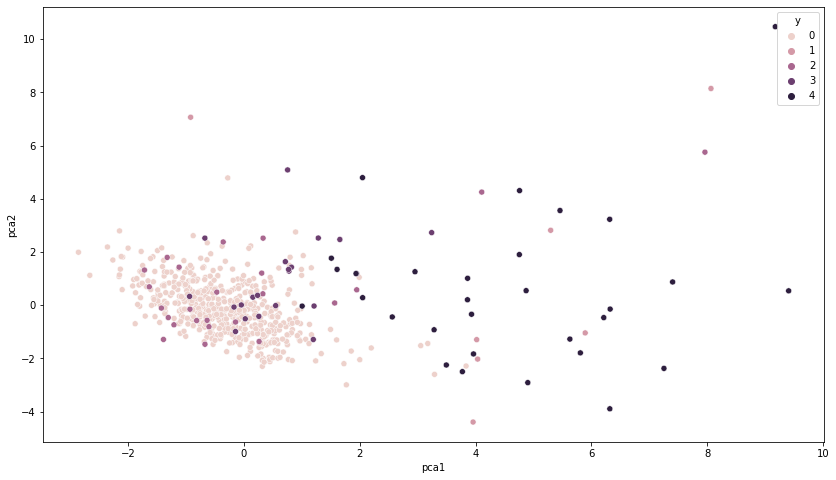

In [34]:
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="pca1", y="pca2",
    hue="y",
    data=num_df,
    legend="full")

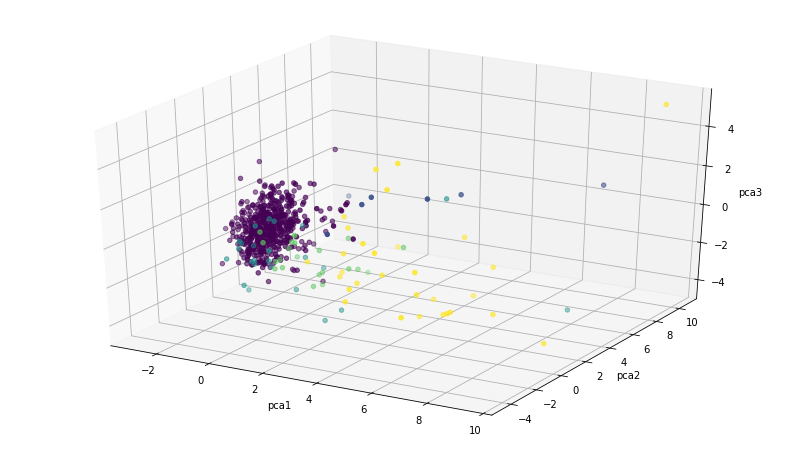

In [35]:
ax = plt.figure(figsize=(14,8)).gca(projection='3d')
ax.scatter(
    xs=num_df["pca1"], 
    ys=num_df["pca2"], 
    zs=num_df["pca3"], 
    c=num_df["y"]
)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.set_zlabel('pca3')
plt.show()

t-SNE

In [36]:
tsne = TSNE(n_components=2, perplexity=40, n_iter=500)
tsne_results = tsne.fit_transform(num_df1)

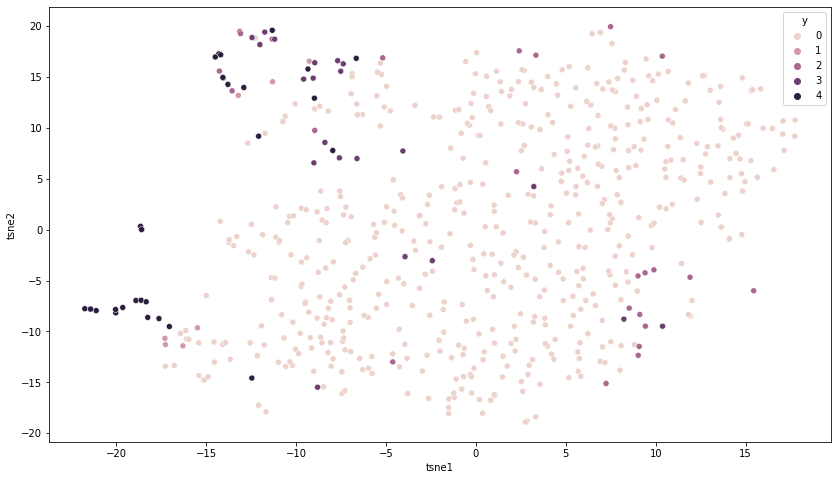

In [38]:
num_df1['tsne1'] = tsne_results[:,0]
num_df1['tsne2'] = tsne_results[:,1]
plt.figure(figsize=(14,8))
num_df1['y'] = df['Category'].cat.codes
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="y",
    data=num_df1,
    legend="full",
)

Clustering

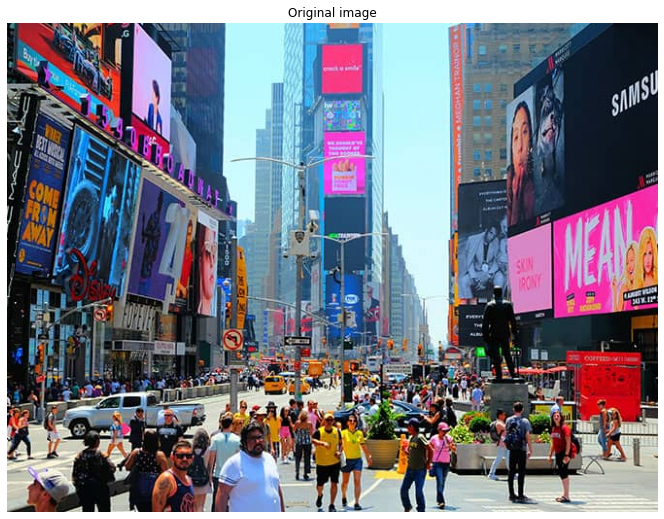

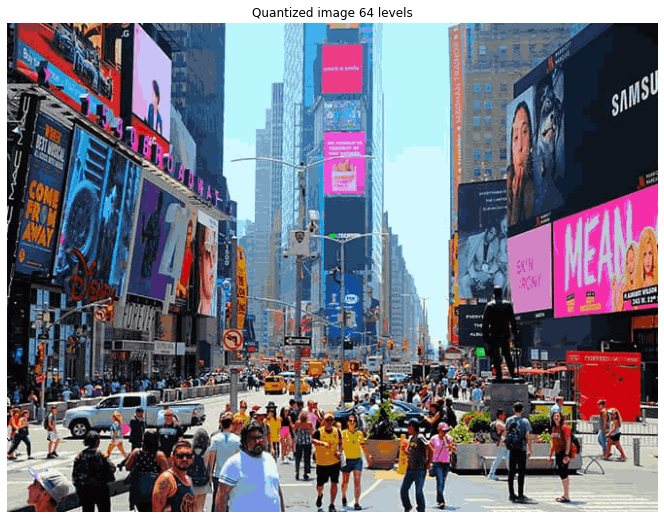

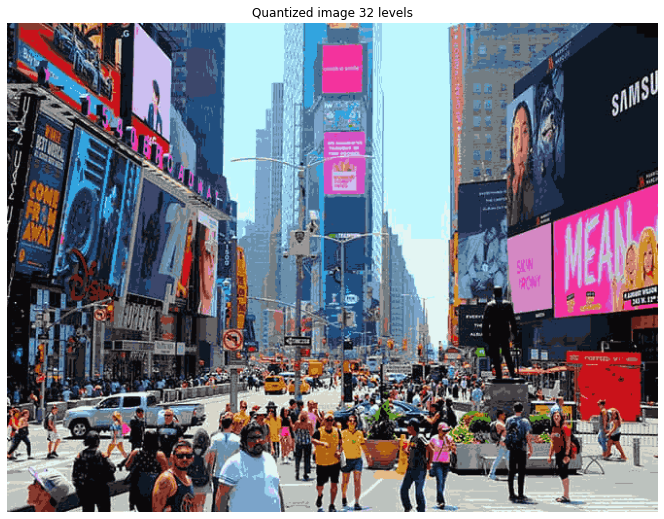

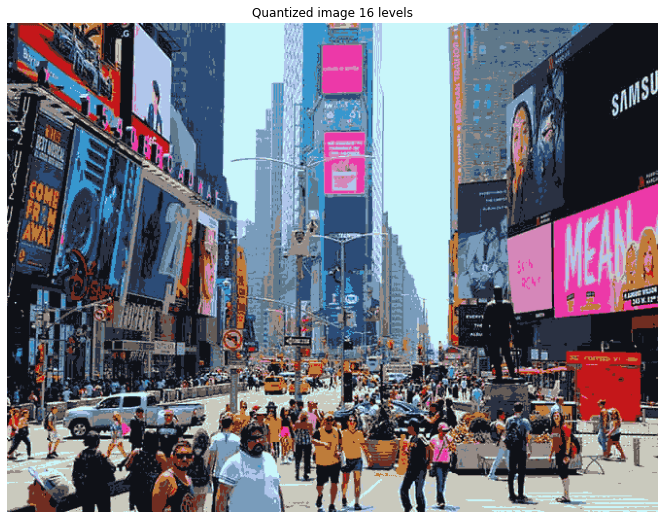

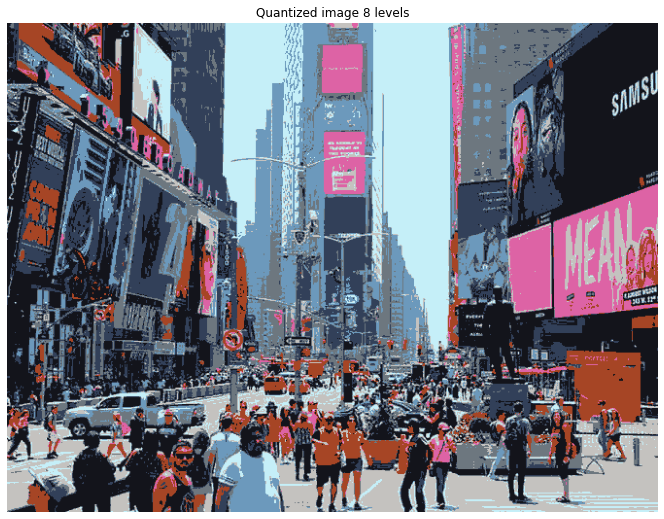

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans


def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


N_COLORS = [64, 32, 16, 8]
SUBSAMPLE_SIZE = 0.01

image = Image.open('city.jpg')
image = np.array(image, dtype=np.float64) / 255

w, h, d = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))
img_subsample = image_array[np.random.choice(w * h, int(w * h * SUBSAMPLE_SIZE)), :]

models = []
for colors in N_COLORS:
    kmeans = KMeans(n_clusters=colors).fit(img_subsample)
    models.append(kmeans)
    
plt.figure(figsize=(16,9))
plt.axis('off')
plt.title('Original image')
plt.imshow(image) 

for model in models:
    labels = model.predict(image_array)
    plt.figure(figsize=(16,9))
    plt.clf()
    plt.axis('off')
    plt.title(f'Quantized image {model.get_params().get("n_clusters")} levels')
    plt.imshow(recreate_image(model.cluster_centers_, labels, w, h))

For n_clusters = 4 The average silhouette_score is : 0.5830422035169395
For n_clusters = 5 The average silhouette_score is : 0.5740089825824137
For n_clusters = 6 The average silhouette_score is : 0.5206045531413668


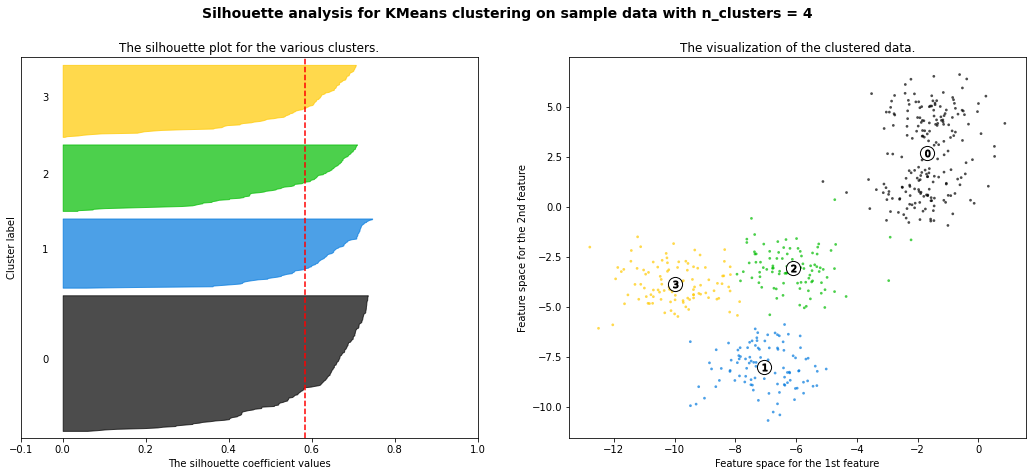

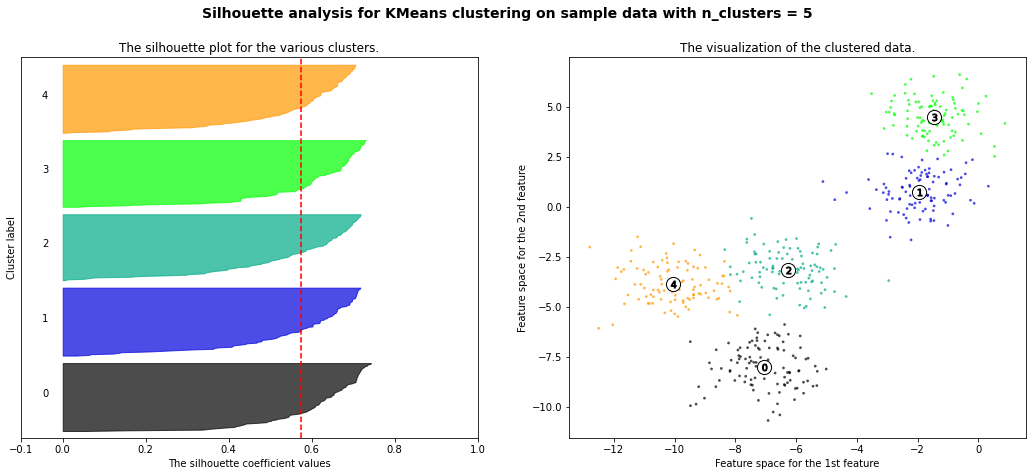

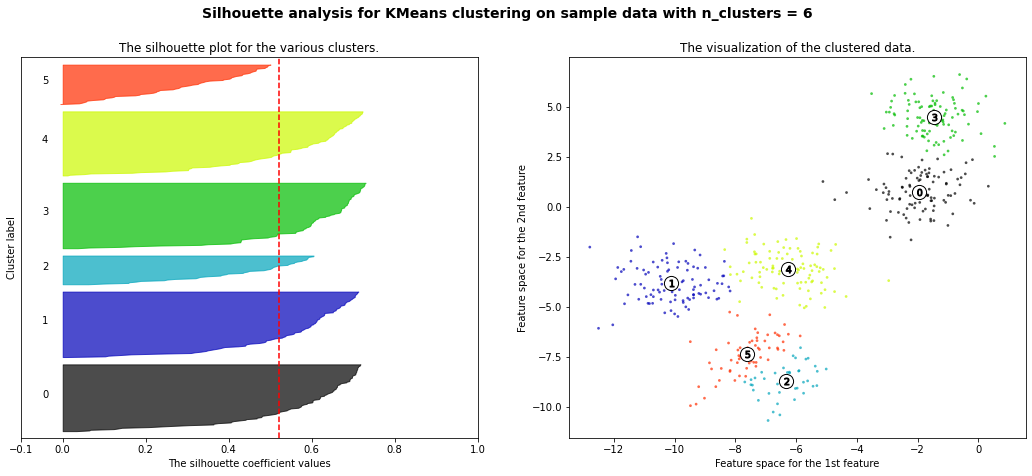

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  shuffle=True,
                  random_state=1)

range_n_clusters = [4, 5, 6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])


    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = clusterer.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

EM

In [41]:
from sklearn.mixture import GaussianMixture
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
mean1 = [0, 0]
cov1 = [[1, 0],
        [0, 1]]

mean2 = [5, 5]
cov2 = [[3, 0],
        [0, 3]]


x1 = np.random.default_rng().multivariate_normal(mean1, cov1, 1000)
x2 = np.random.default_rng().multivariate_normal(mean2, cov2, 1000)
df = np.vstack([x1,x2])

In [43]:
gm = GaussianMixture(n_components=2, covariance_type='diag')
labels = gm.fit_predict(df)

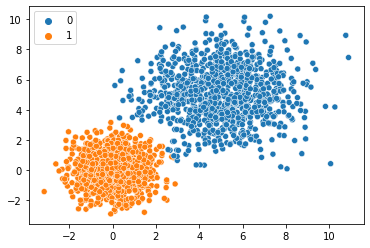

In [44]:
sns.scatterplot(x=df[:,0], y=df[:,1], hue=labels)

In [45]:
gm.covariances_[0]

array([3.00193488, 3.14758618])

In [46]:
x1 = np.random.default_rng().multivariate_normal(gm.means_[0], np.diag(gm.covariances_[0]), 1000)
x2 = np.random.default_rng().multivariate_normal(gm.means_[1], np.diag(gm.covariances_[1]), 1000)
df = np.vstack([x1,x2])

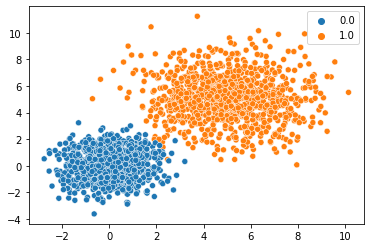

In [47]:
sns.scatterplot(x=df[:,0], y=df[:,1], hue=np.hstack([np.ones((1000)),np.zeros((1000))]))

lANGUAGE PROCESSING

In [1]:
import string
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

pd.set_option('max_colwidth', 400)

In [2]:
corpus = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=["type", 'text'])

In [3]:
corpus

type  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                  text  
0                                                      Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...  
1                                                                                                                                        Ok lar... Joking wif u oni...  
2          Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's  
3                                                                                                                    U dun say so early hor... U c already then say...  
4                                                                                                        Nah I don't think he goes to usf, he lives around here though  
...                                                                                                                                                                ...  
5567  This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.  
5568                                                                                                                              Will ü b going to esplanade fr home?  
5569                                                                                                         Pity, * was in mood for that. So...any other suggestions?  
5570                                     The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free  
5571                                                                                                                                        Rofl. Its true to its name  

[5572 rows x 2 columns]

In [4]:
corpus['text'] = corpus['text'].str.lower()
corpus['text'] = corpus['text'].str.strip()

In [5]:
corpus

type  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                  text  
0                                                      go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...  
1                                                                                                                                        ok lar... joking wif u oni...  
2          free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's  
3                                                                                                                    u dun say so early hor... u c already then say...  
4                                                                                                        nah i don't think he goes to usf, he lives around here though  
...                                                                                                                                                                ...  
5567  this is the 2nd time we have tried 2 contact u. u have won the £750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.  
5568                                                                                                                              will ü b going to esplanade fr home?  
5569                                                                                                         pity, * was in mood for that. so...any other suggestions?  
5570                                     the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for free  
5571                                                                                                                                        rofl. its true to its name  

[5572 rows x 2 columns]

replace numbers with tokens

In [6]:
corpus['text'] = corpus['text'].str.replace('\d+','NUMBER', regex=True)

In [7]:
corpus

type  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                                                       text  
0                                                                           go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...  
1                                                                                                                                                             ok lar... joking wif u oni...  
2                    free entry in NUMBER a wkly comp to win fa cup final tkts NUMBERst may NUMBER. text fa to NUMBER to receive entry question(std txt rate)t&c's apply NUMBERoverNUMBER's  
3                                                                                                                                         u dun say so early hor... u c already then say...  
4                                                                                                                             nah i don't think he goes to usf, he lives around here though  
...                                                                                                                                                                                     ...  
5567  this is the NUMBERnd time we have tried NUMBER contact u. u have won the £NUMBER pound prize. NUMBER claim is easy, call NUMBER nowNUMBER! only NUMBERp per minute. bt-national-rate.  
5568                                                                                                                                                   will ü b going to esplanade fr home?  
5569                                                                                                                              pity, * was in mood for that. so...any other suggestions?  
5570                                                          the guy did some bitching but i acted like i'd be interested in buying something else next week and he gave it to us for free  
5571                                                                                                                                                             rofl. its true to its name  

[5572 rows x 2 columns]

In [8]:
stop_words = stopwords.words('english')

In [9]:
corpus['text'] = corpus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [10]:
table = str.maketrans('', '', string.punctuation)
corpus['text'] = corpus['text'].str.translate(table)

In [11]:
lemmatizer = WordNetLemmatizer()
corpus['text'] = corpus['text'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [12]:
corpus

type  \
0      ham   
1      ham   
2     spam   
3      ham   
4      ham   
...    ...   
5567  spam   
5568   ham   
5569   ham   
5570   ham   
5571   ham   

                                                                                                                                                    text  
0                                                                     go jurong point crazy available bugis n great world la e buffet cine got amore wat  
1                                                                                                                                ok lar joking wif u oni  
2     free entry NUMBER wkly comp win fa cup final tkts NUMBERst may NUMBER text fa NUMBER receive entry questionstd txt ratetcs apply NUMBERoverNUMBERs  
3                                                                                                                    u dun say early hor u c already say  
4                                                                                                                    nah think go usf life around though  
...                                                                                                                                                  ...  
5567                NUMBERnd time tried NUMBER contact u u £NUMBER pound prize NUMBER claim easy call NUMBER nowNUMBER NUMBERp per minute btnationalrate  
5568                                                                                                                         ü b going esplanade fr home  
5569                                                                                                                     pity mood that soany suggestion  
5570                                                                   guy bitching acted like id interested buying something else next week gave u free  
5571                                                                                                                                      rofl true name  

[5572 rows x 2 columns]

In [13]:
def generate_word_cloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

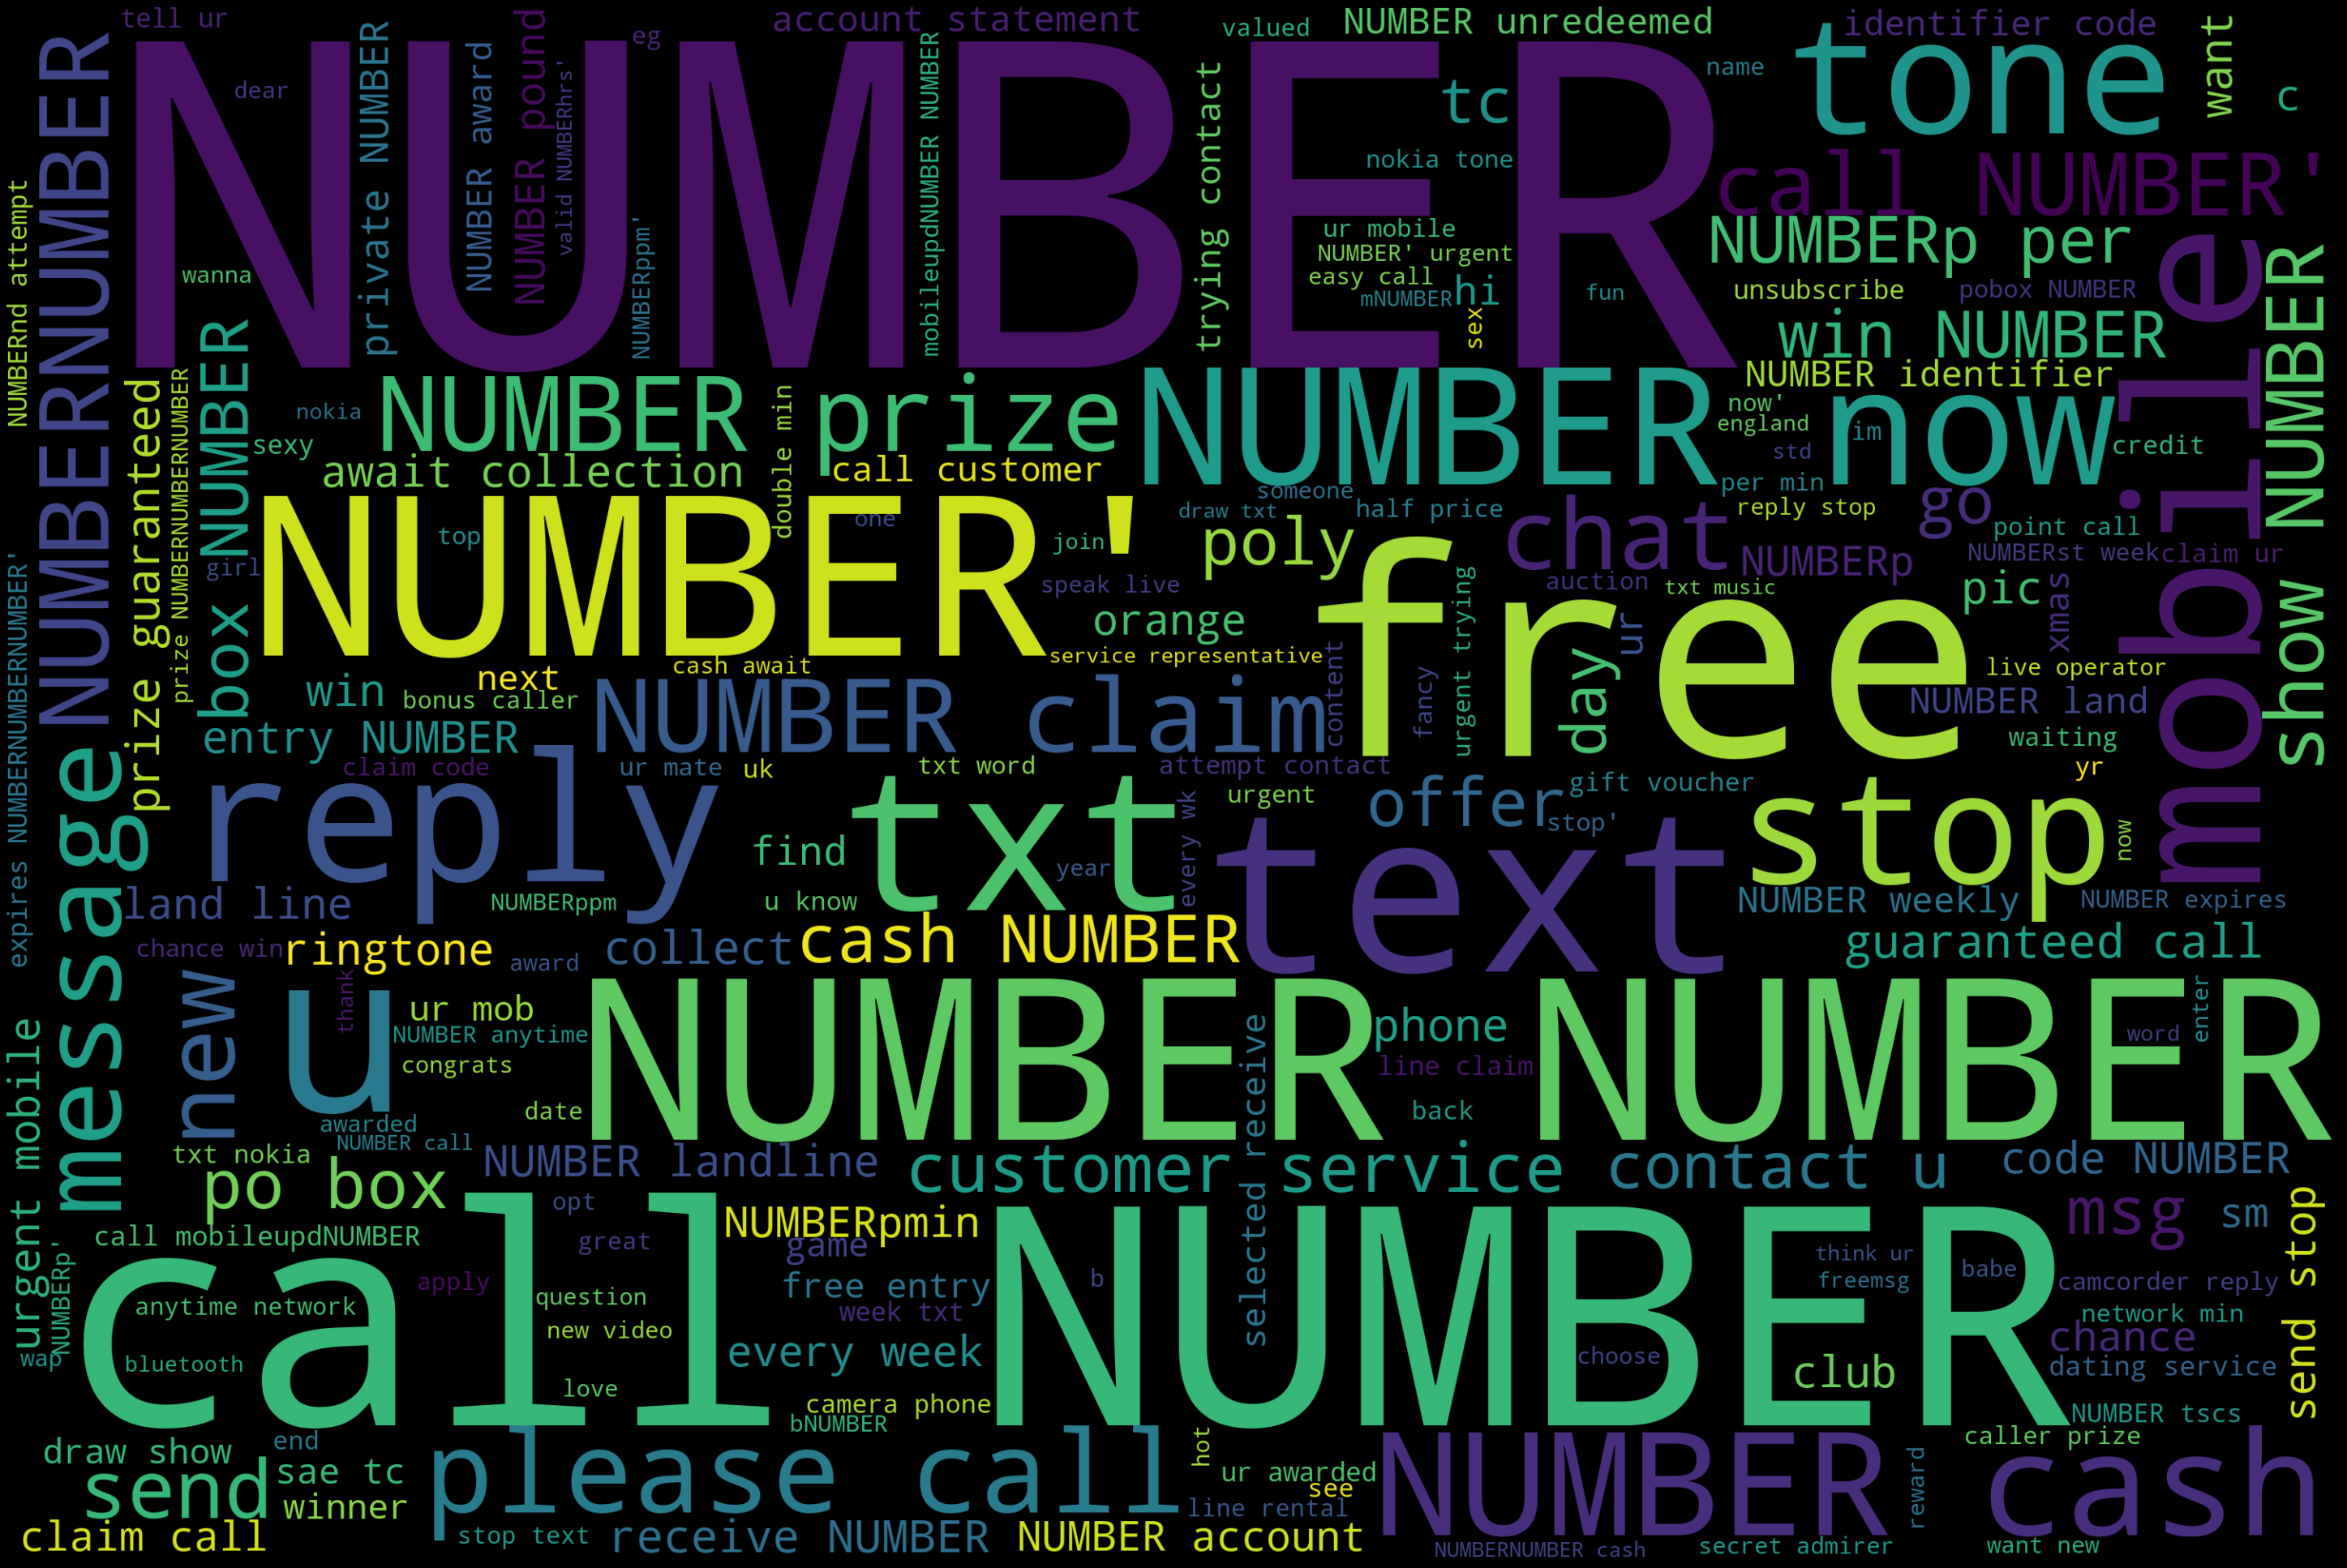

In [17]:
generate_word_cloud(corpus[corpus['type']=='spam'].text.values)

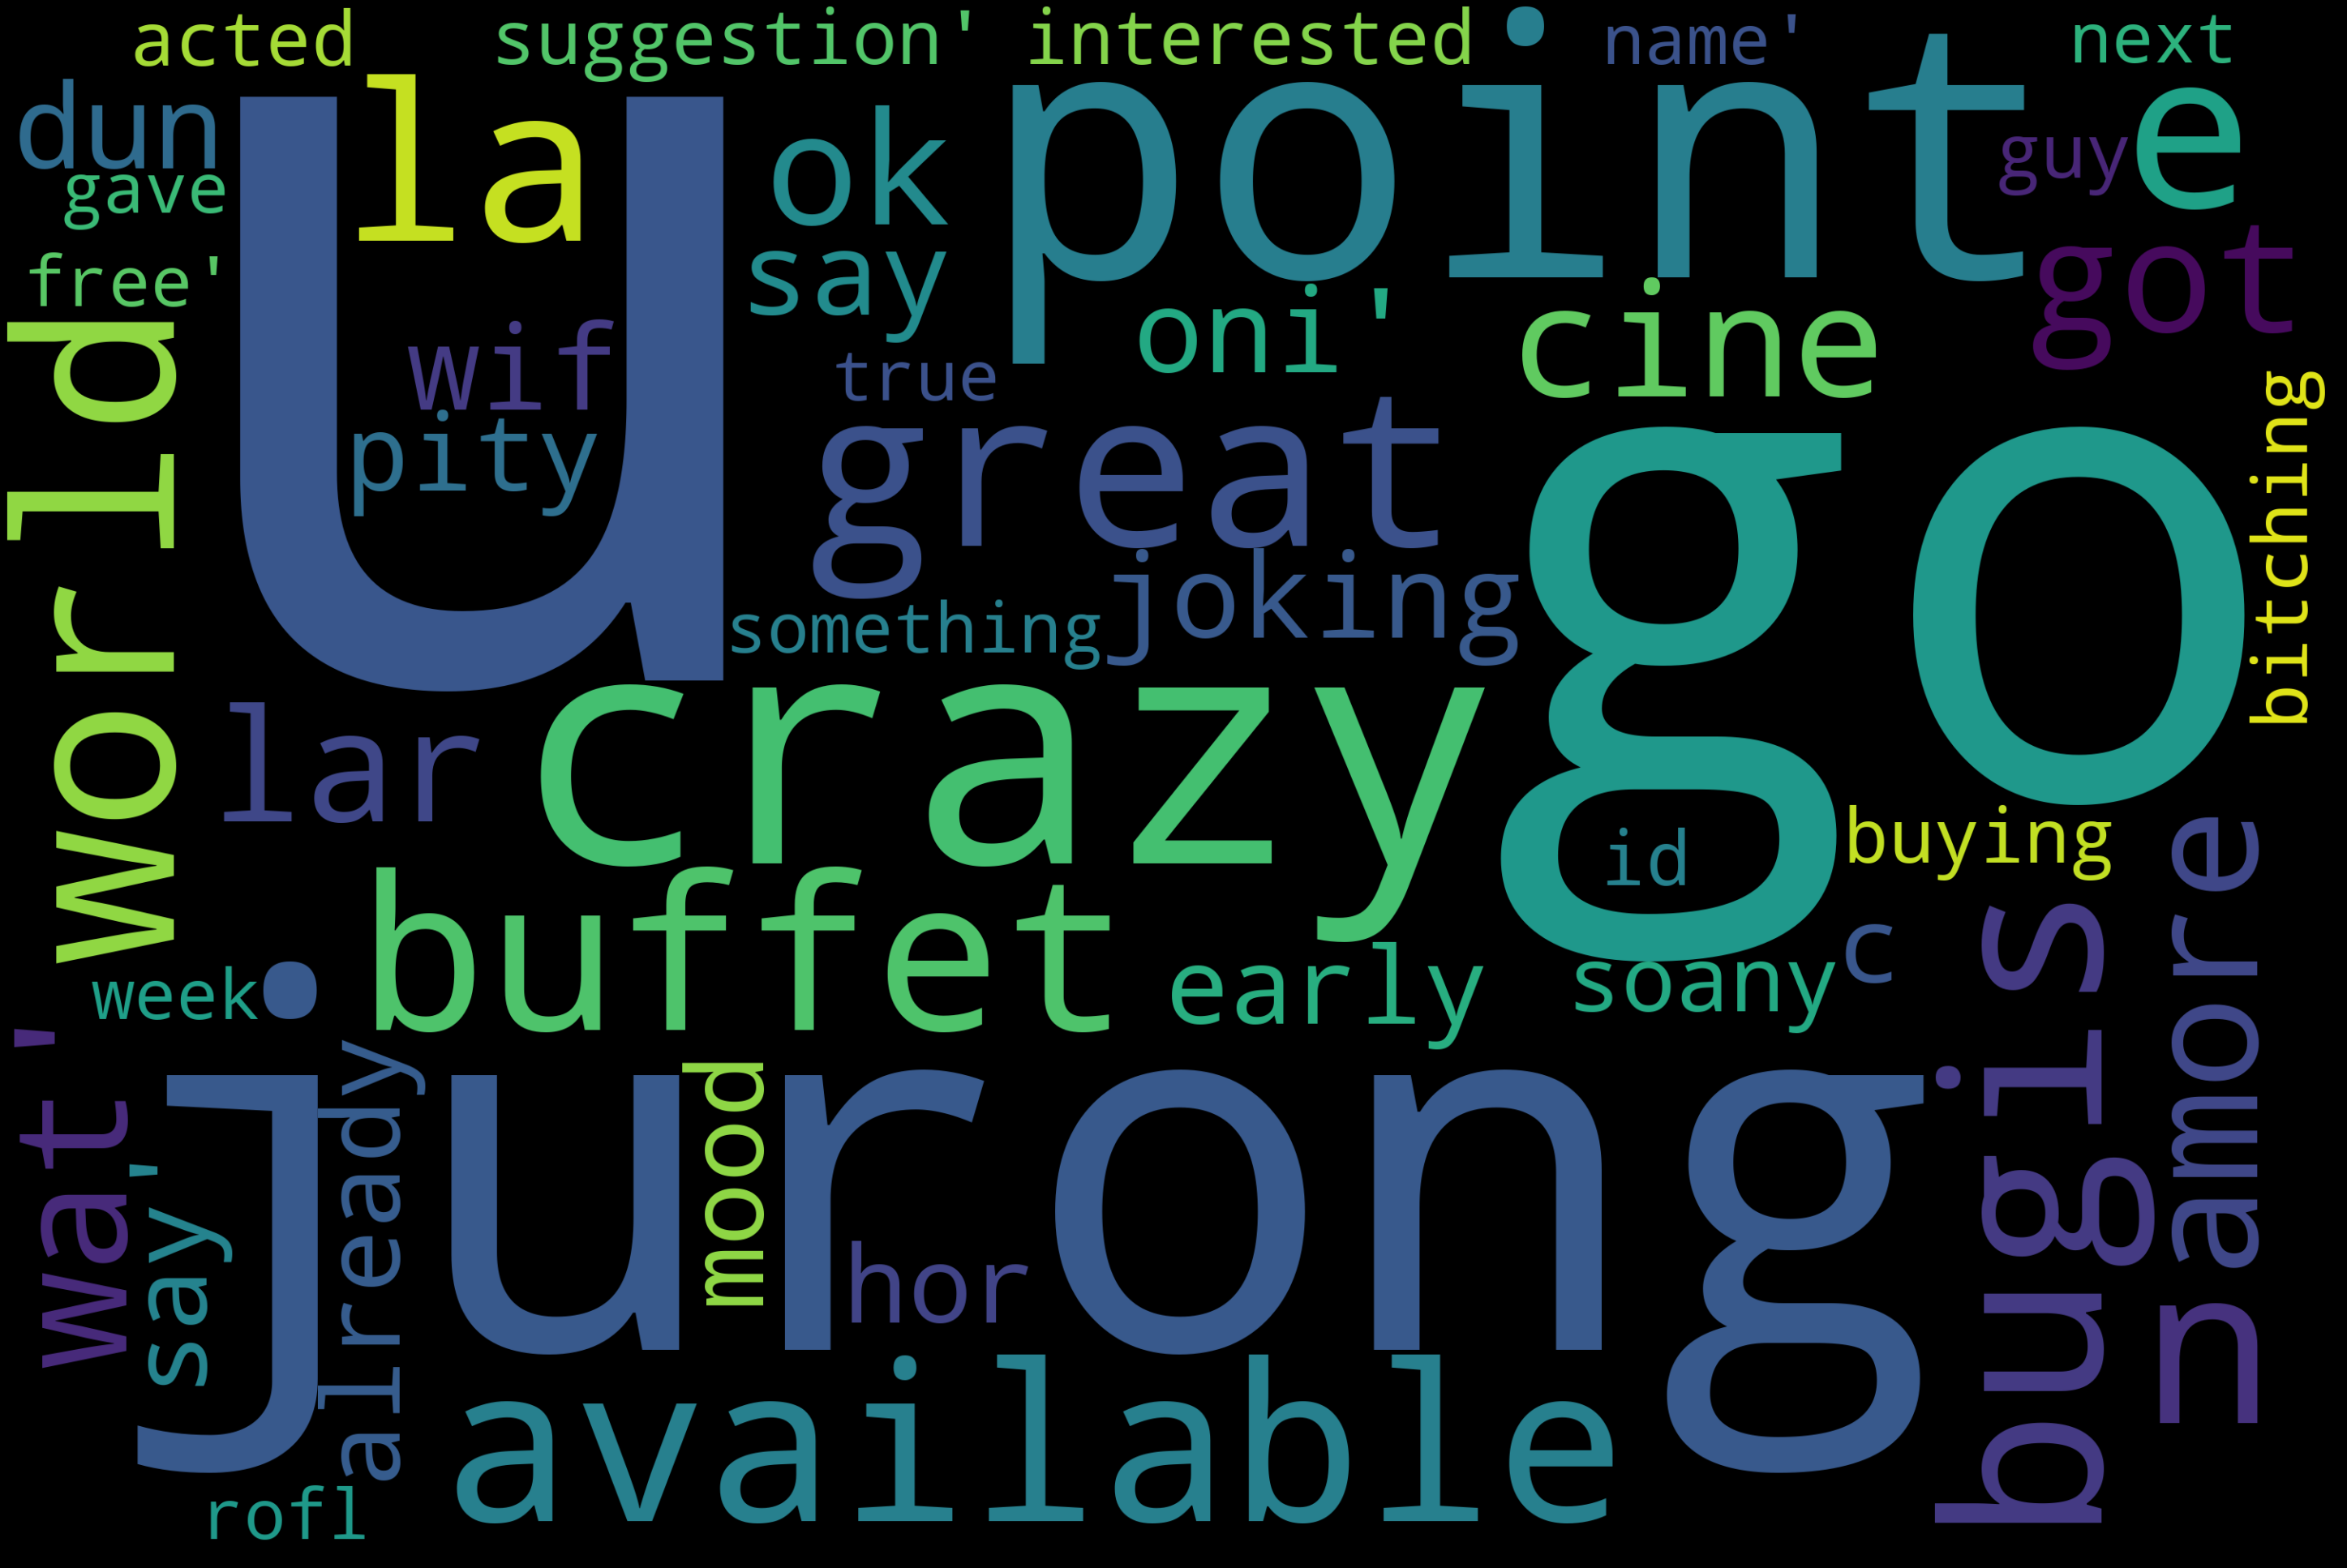

In [18]:
generate_word_cloud(corpus[corpus['type']=='ham'].text.values)

feature extraction

In [33]:
X = TfidfVectorizer(max_features=8000).fit_transform(corpus['text'])
y = corpus['type']


In [34]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: object

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=88)

model = MultinomialNB().fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 96.32%
